In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('AMZN.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [75]:
data = data[['Date', 'Close', 'Low', 'High', 'Volume']]
data

,Date,Close,Low,High,Volume
0,1997-05-15,0.097917,0.096354,0.125000,1443120000
1,1997-05-16,0.086458,0.085417,0.098958,294000000
2,1997-05-19,0.085417,0.081250,0.088542,122136000
3,1997-05-20,0.081771,0.081771,0.087500,109344000
4,1997-05-21,0.071354,0.068750,0.082292,377064000
...,...,...,...,...,...
6511,2023-03-30,102.000000,101.010002,103.040001,53633400
6512,2023-03-31,103.290001,101.949997,103.489998,56704300
6513,2023-04-03,102.410004,101.430000,103.290001,41135700
6514,2023-04-04,103.949997,102.110001,104.199997,48662500


In [76]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

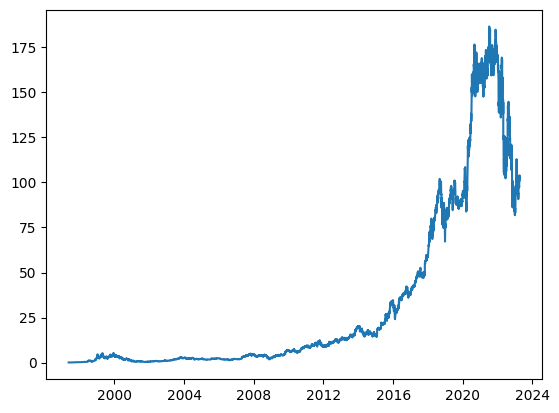

In [77]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [78]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    df.dropna(inplace=True)
        
    df1 = df[['Date', 'Close']]
    df2 = df[['Date', 'Low']]
    df3 = df[['Date', 'High']]
    df4 = df[['Date', 'Volume']]
    
    df1.set_index('Date', inplace=True)
    df2.set_index('Date', inplace=True)
    df3.set_index('Date', inplace=True)
    df4.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df1[f'Close(t-{i})'] = df1['Close'].shift(i)
        df2[f'Low(t-{i})'] = df2['Low'].shift(i)
        df3[f'High(t-{i})'] = df3['High'].shift(i)
        df4[f'Volume(t-{i})'] = df4['Volume'].shift(i)
        
    df1.dropna(inplace=True)
    df2.dropna(inplace=True)
    df3.dropna(inplace=True)
    df4.dropna(inplace=True)
    
    return df1, df2, df3, df4

lookback = 7
df1, df2, df3, df4 = prepare_dataframe_for_lstm(data, lookback)
df1



C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\1427372150.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f'Close(t-{i})'] = df1['Close'].shift(i)
C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\1427372150.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[f'Low(t-{i})'] = df2['Low'].shift(i)
C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\1427372150.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [79]:
df1_np = df1.to_numpy()
df2_np = df2.to_numpy()
df3_np = df3.to_numpy()
df4_np = df4.to_numpy()

df1_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
df1_np = scaler.fit_transform(df1_np)
df2_np = scaler.fit_transform(df2_np)
df3_np = scaler.fit_transform(df3_np)
df4_np = scaler.fit_transform(df4_np)

df1_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [195]:
# X = np.array([df1_np[:, 1:], df2_np[:, 1:], df3_np[:, 1:], df4_np[:, 1:]])
# y = np.array([df1_np[:, 0], df2_np[:, 0], df3_np[:, 0], df4_np[:, 0]])

X = np.zeros((len(df1_np), 4 * lookback))
y = np.zeros((len(df1_np), 4))
for i in range(0,len(df1_np)):
    X[i] = np.hstack((df1_np[i,1:], df2_np[i,1:], df3_np[i,1:], df4_np[i,1:]))
    y[i] = np.hstack((df1_np[i,0], df2_np[i,0], df3_np[i,0], df4_np[i,0]))

X.shape, y.shape

((6509, 28), (6509, 4))

In [196]:
X = dc(np.flip(X, axis=1)) #flip left right
X

array([[ 0.38034321, -0.72626105, -0.89176634, ..., -0.99998325,
        -1.        , -0.99995531],
       [-0.72626105, -0.89176634, -0.90408505, ..., -1.        ,
        -0.99994415, -0.99991063],
       [-0.89176634, -0.90408505, -0.6462703 , ..., -0.99994415,
        -0.99989946, -0.99993855],
       ...,
       [-0.9539538 , -0.95536353, -0.96439081, ...,  0.07431453,
         0.09308121,  0.10690997],
       [-0.95536353, -0.96439081, -0.97209597, ...,  0.09308121,
         0.10691495,  0.09747299],
       [-0.96439081, -0.97209597, -0.96144209, ...,  0.10691495,
         0.09747802,  0.11398769]])

In [197]:
split_index = int(len(X[0]) * 0.95)

split_index

26

In [198]:
X_train = X[:, :split_index]
X_test = X[:, split_index:]

y_train = y[:, :split_index]
y_test = y[:, split_index:]
.33
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6509, 26), (6509, 2), (6509, 4), (6509, 0))

In [199]:
_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.shape, y_train.shape

ValueError: cannot reshape array of size 169234 into shape (7,1)

In [116]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\4239149354.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).float()
C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\4239149354.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).float()
C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\4239149354.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).float()
C:\Users\o00494123\AppData\Local\Temp\ipykernel_4140\4239149354.py:4: UserWarn

(torch.Size([4, 6183, 7, 1]),
 torch.Size([4, 326, 7, 1]),
 torch.Size([4, 6183, 1]),
 torch.Size([4, 326, 1]))

In [119]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [120]:
train_dataset

In [121]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [122]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([4, 6183, 7, 1]) torch.Size([4, 6183, 1])


In [138]:
class FlattenNserieses(nn.Module):
    def __init__(self, module, batch_first=False):
        super(FlattenNserieses, self).__init__()
        self.module = module
        self.batch_first = batch_first

    def forward(self, x):

        if len(x.size()) <= 2:
            return self.module(x)

        # Squash all samples and timesteps into a single axis
        x_reshape = x.contiguous().view(-1, x.size(-1))  # (samples * timesteps, input_size)
        print(x_reshape.shape)
        
        y = self.module(x_reshape)

        # We have to reshape Y
        if self.batch_first:
            y = y.contiguous().view(x.size(0), -1, y.size(-1))  # (samples, timesteps, output_size)
        else:
            y = y.view(-1, x.size(1), y.size(-1))  # (timesteps, samples, output_size)
        
        print(y.shape)
        return y

In [144]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 4)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(4, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=4, bias=True)
)

In [145]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [146]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [147]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


AssertionError: LSTM: Expected input to be 2-D or 3-D but received 4-D tensor

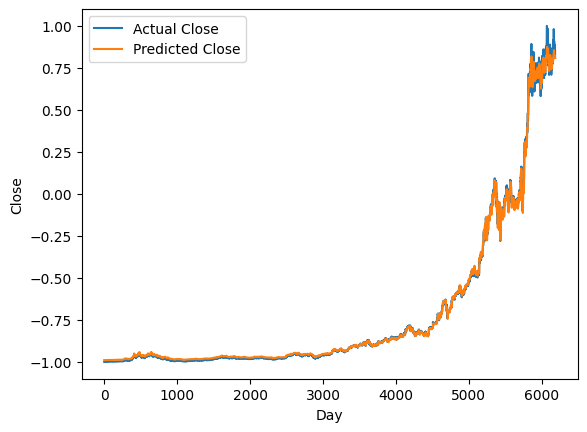

In [23]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# New Section

In [26]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  0.46521518,   0.46471495,   0.46391458, ..., 170.28218287,
       169.28469987, 169.83776646])

In [27]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.91646265e-02, 7.65634249e-02, 7.52572660e-02, ...,
       1.69091505e+02, 1.73315001e+02, 1.68871003e+02])

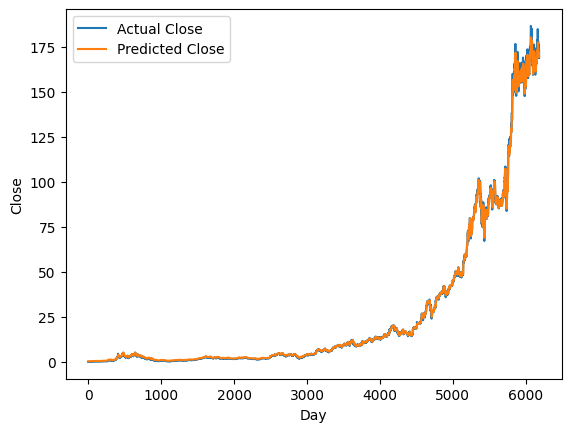

In [28]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [29]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([168.77699867, 168.57639489, 167.54071647, 167.95684203,
       168.35831638, 168.64876166, 168.47354738, 168.70067453,
       168.35712694, 167.92102548, 166.99237428, 167.56870718,
       166.98897271, 165.6401941 , 164.41547279, 163.33049382,
       162.21221057, 162.78827668, 163.17174271, 162.20002716,
       161.95143455, 160.6150839 , 158.77387782, 155.81260989,
       150.45549077, 147.63081927, 143.82379398, 141.0491567 ,
       139.80064941, 141.13746416, 144.54972932, 147.38672873,
       149.13563663, 145.42113186, 150.22189397, 152.96898519,
       156.11241504, 158.20729387, 158.84731174, 157.07483741,
       156.12542105, 155.91957041, 156.32110033, 155.45985805,
       154.31511813, 152.68163022, 149.4076734 , 149.73759247,
       150.85164043, 151.73116894, 151.57480783, 151.89157638,
       150.39191696, 148.32031555, 143.64921333, 139.9866659 ,
       138.93151459, 141.52187507, 143.04866925, 142.85486861,
       145.08017435, 148.4006749 , 151.8812605 , 155.56

In [30]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

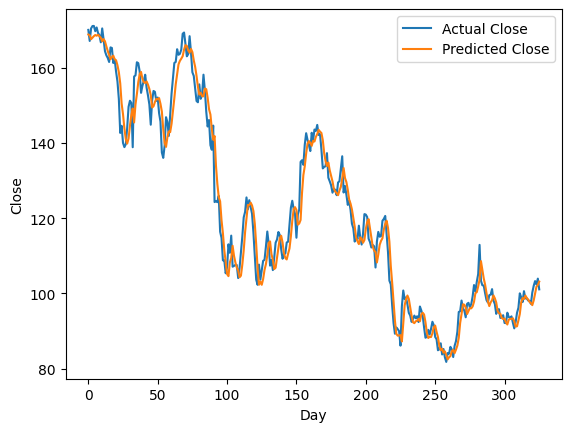

In [31]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
